In [30]:
import numpy as np
import pandas as pd
import h5py
from scipy import io as sio
from pyod import models
from sklearn.metrics import roc_auc_score, accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

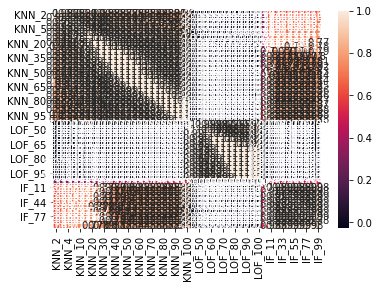

In [2]:
import sklearn

In [3]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest

In [4]:
def get_X_y_73(filename):
    f=h5py.File(filename, 'r')
    d={}
    for k, v in f.items():
        d[k]=v
        print(k, v)
    X=d['X'].value.T
    y=d['y'].value[0]
    
    X=X-np.min(X, axis=0)
    X=X/np.max(X, axis=0)
    
    return X, y

def get_X_y_50(filename):
    dat = sio.loadmat(filename)
    X=dat['X']
    y=dat['y']
    y=y.reshape((-1,))
    X=X-np.min(X, axis=0)
    X=X/np.max(X, axis=0)
    
    return X, y

In [5]:
X, y = get_X_y_50('data/mammography.mat')
n_features = X.shape[1]
n_samples = len(y)
n_anomalies = sum(y)

In [6]:
df_prediction = pd.DataFrame()
df_info = pd.DataFrame()

In [7]:
ks=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# KNN

In [8]:
aucs=[]
for k in ks:
    knn_clf = KNN(contamination=n_anomalies/n_samples, n_neighbors=k)
    knn_clf.fit(X)
    p=knn_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'KNN_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'KNN_{k}',"auc":auc}, ignore_index=True)

1 0.5
2 0.8114712075437152
3 0.8222714596581666
4 0.8374611793040796
5 0.8399171825153698
10 0.8427020612821217
15 0.8457063077909
20 0.8460918738864358
25 0.8451526067084978
30 0.8448195057711675
35 0.8448733793899956
40 0.844552778540694
45 0.8438068225832576
50 0.8430101620433946
55 0.8419423728336115
60 0.8410779301262685
65 0.8404245804547918
70 0.839368587102726
75 0.8390053803195797
80 0.8382710441622828
85 0.8377196318283933
90 0.8374073056852512
95 0.8369618800132395
100 0.836816104338763


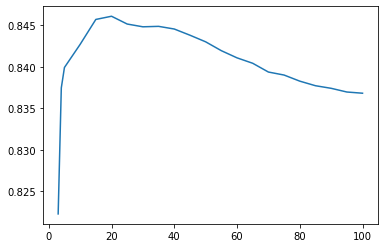

In [9]:
plt.plot(ks[2:], aucs[2:])
plt.show()

# LOF

In [10]:
aucs=[]
for k in ks:
    knn_clf = LOF(contamination=n_anomalies/n_samples, n_neighbors=k)
    knn_clf.fit(X)
    p=knn_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'LOF_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'LOF_{k}',"auc":auc}, ignore_index=True)

1 0.5
2 0.5519355770111056
3 0.5561547968647667
4 0.6247616180395636
5 0.6271192050648243
10 0.6818032169240629
15 0.7080247043993269
20 0.7332069239924225
25 0.7567870196268988
30 0.7643853125726237
35 0.7782385791449234
40 0.789668589215417
45 0.8106159198304214
50 0.8211902900724654
55 0.8272227269206122
60 0.832485792153466
65 0.8373224459327178
70 0.8411538109423305
75 0.8453165163134951
80 0.8492221776209692
85 0.8507147937661532
90 0.8525563560306761
95 0.8545183416784625
100 0.8562620159296898


In [11]:
df_prediction

,KNN_1,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,...,LOF_55,LOF_60,LOF_65,LOF_70,LOF_75,LOF_80,LOF_85,LOF_90,LOF_95,LOF_100
0,0.0,0.035469,0.039380,0.041745,0.052020,0.055634,0.062790,0.065135,0.067776,0.071151,...,1.857818e-10,1.843992e-10,2.200894e-10,2.065595e-10,2.030874e-10,2.483161e-10,2.581481e-10,2.529605e-10,2.445455e-10,2.455958e-10
1,0.0,0.002815,0.003263,0.004933,0.006903,0.009637,0.010924,0.011743,0.011917,0.012599,...,2.127374e-09,1.951663e-09,1.906814e-09,1.820994e-09,1.720235e-09,1.614611e-09,1.637425e-09,1.654902e-09,1.636531e-09,1.671873e-09
2,0.0,0.007106,0.010363,0.014177,0.018376,0.044168,0.050111,0.066245,0.081308,0.086114,...,1.879260e-08,1.888978e-08,2.075244e-08,2.081614e-08,2.107609e-08,2.212050e-08,2.240440e-08,2.337443e-08,2.409695e-08,2.451875e-08
3,0.0,0.005432,0.005266,0.005687,0.006151,0.008209,0.009820,0.011512,0.012525,0.013432,...,9.804696e-10,9.254160e-10,8.489941e-10,8.591011e-10,8.322677e-10,7.735884e-10,7.321658e-10,6.691688e-10,6.893404e-10,7.032700e-10
4,0.0,0.011710,0.011423,0.012894,0.013028,0.017518,0.021455,0.021887,0.022281,0.024277,...,3.818803e-10,4.645722e-10,4.378968e-10,3.994995e-10,3.960053e-10,4.013368e-10,3.758487e-10,3.432886e-10,3.076431e-10,2.831896e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,0.0,0.036481,0.037588,0.040394,0.044808,0.050729,0.051477,0.054719,0.057685,0.058586,...,3.865821e-09,3.486193e-09,3.269951e-09,3.130594e-09,3.009267e-09,2.909260e-09,2.736795e-09,2.754801e-09,2.782809e-09,2.700223e-09
11179,0.0,0.021554,0.026656,0.032883,0.032863,0.040829,0.046781,0.047306,0.048504,0.052606,...,2.822295e-09,2.698716e-09,2.484729e-09,2.378909e-09,2.301383e-09,2.254811e-09,2.161240e-09,1.974933e-09,1.948501e-09,1.862951e-09
11180,0.0,0.170295,0.183689,0.185792,0.196414,0.216590,0.214243,0.217077,0.221127,0.222523,...,2.082581e-08,1.927007e-08,1.791942e-08,1.669309e-08,1.573940e-08,1.494035e-08,1.418709e-08,1.378683e-08,1.319389e-08,1.275399e-08
11181,0.0,0.027953,0.030107,0.038836,0.039334,0.042713,0.043050,0.043401,0.044332,0.045102,...,2.117447e-09,1.983750e-09,1.803767e-09,1.655741e-09,1.538117e-09,1.542646e-09,1.509012e-09,1.453697e-09,1.465182e-09,1.456842e-09


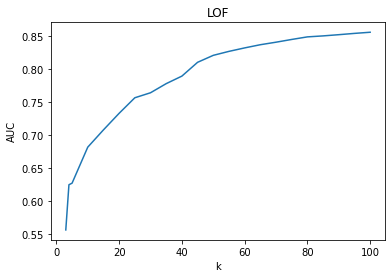

In [12]:
plt.plot(ks[2:], aucs[2:])
plt.xlabel("k")
plt.ylabel("AUC")
plt.title("LOF")
plt.show()

In [13]:
ocsvm_clf=OCSVM(contamination=n_anomalies/n_samples)

In [14]:
ocsvm_clf.fit(X)

OCSVM(cache_size=200, coef0=0.0, contamination=0.023249575248144506, degree=3,
   gamma='auto', kernel='rbf', max_iter=-1, nu=0.5, shrinking=True,
   tol=0.001, verbose=False)

In [15]:
p=ocsvm_clf.predict_proba(X)

In [16]:
roc_auc_score(y, p[:,1])

0.8412298678159705

In [17]:
df_prediction[f'OCSVM']=p[:,1]
df_info=df_info.append({'algorithm':f'OCSVM',"auc":auc}, ignore_index=True)

# Isolation Forest

In [18]:
for k in [11,22,33,44,55,66,77,88,99]:
    if_clf = IForest(contamination=n_anomalies/n_samples, random_state=k)
    if_clf.fit(X)
    p=if_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'IF_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'IF_{k}',"auc":auc}, ignore_index=True)

11 0.8747161951844732
22 0.8385904126085395
33 0.8726410045141163
44 0.8523964957499701
55 0.8577370263170867
66 0.8754438411538109
77 0.8549102458468018
88 0.8628257945478488
99 0.8535176304058479


In [19]:
df_prediction

,KNN_1,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,...,OCSVM,IF_11,IF_22,IF_33,IF_44,IF_55,IF_66,IF_77,IF_88,IF_99
0,0.0,0.035469,0.039380,0.041745,0.052020,0.055634,0.062790,0.065135,0.067776,0.071151,...,0.421748,0.462095,0.570605,0.509515,0.522481,0.533379,0.544345,0.506547,0.501776,0.607311
1,0.0,0.002815,0.003263,0.004933,0.006903,0.009637,0.010924,0.011743,0.011917,0.012599,...,0.070474,0.186360,0.232686,0.229365,0.208423,0.205159,0.152306,0.180051,0.162407,0.162563
2,0.0,0.007106,0.010363,0.014177,0.018376,0.044168,0.050111,0.066245,0.081308,0.086114,...,0.095633,0.588532,0.638472,0.530980,0.583698,0.579670,0.592902,0.551102,0.552035,0.627638
3,0.0,0.005432,0.005266,0.005687,0.006151,0.008209,0.009820,0.011512,0.012525,0.013432,...,0.068444,0.169560,0.172585,0.188740,0.220040,0.194016,0.158323,0.177574,0.175239,0.178127
4,0.0,0.011710,0.011423,0.012894,0.013028,0.017518,0.021455,0.021887,0.022281,0.024277,...,0.065109,0.070517,0.096954,0.126549,0.088455,0.098815,0.094972,0.106468,0.076619,0.124034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,0.0,0.036481,0.037588,0.040394,0.044808,0.050729,0.051477,0.054719,0.057685,0.058586,...,0.089876,0.386602,0.341254,0.439696,0.385933,0.343503,0.409670,0.417332,0.374255,0.408287
11179,0.0,0.021554,0.026656,0.032883,0.032863,0.040829,0.046781,0.047306,0.048504,0.052606,...,0.118008,0.329467,0.298597,0.370980,0.328148,0.318803,0.365430,0.288771,0.330451,0.348148
11180,0.0,0.170295,0.183689,0.185792,0.196414,0.216590,0.214243,0.217077,0.221127,0.222523,...,0.142156,0.695091,0.752915,0.760643,0.650750,0.708074,0.729838,0.715989,0.663992,0.684970
11181,0.0,0.027953,0.030107,0.038836,0.039334,0.042713,0.043050,0.043401,0.044332,0.045102,...,0.110364,0.224199,0.212945,0.293069,0.242526,0.283695,0.282204,0.273200,0.224560,0.258324


In [20]:
df_info

,algorithm,auc
0,KNN_1,0.500000
1,KNN_2,0.811471
2,KNN_3,0.822271
3,KNN_4,0.837461
4,KNN_5,0.839917
5,KNN_10,0.842702
6,KNN_15,0.845706
7,KNN_20,0.846092
8,KNN_25,0.845153
9,KNN_30,0.844820


In [23]:
for i, r in df_info.iterrows():
    if r['auc']<0.8:
        print(r['algorithm'])
        del df_prediction[r['algorithm']]

KNN_1
LOF_1
LOF_2
LOF_3
LOF_4
LOF_5
LOF_10
LOF_15
LOF_20
LOF_25
LOF_30
LOF_35
LOF_40


In [24]:
df_prediction

,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,KNN_35,...,OCSVM,IF_11,IF_22,IF_33,IF_44,IF_55,IF_66,IF_77,IF_88,IF_99
0,0.035469,0.039380,0.041745,0.052020,0.055634,0.062790,0.065135,0.067776,0.071151,0.075127,...,0.421748,0.462095,0.570605,0.509515,0.522481,0.533379,0.544345,0.506547,0.501776,0.607311
1,0.002815,0.003263,0.004933,0.006903,0.009637,0.010924,0.011743,0.011917,0.012599,0.013667,...,0.070474,0.186360,0.232686,0.229365,0.208423,0.205159,0.152306,0.180051,0.162407,0.162563
2,0.007106,0.010363,0.014177,0.018376,0.044168,0.050111,0.066245,0.081308,0.086114,0.093844,...,0.095633,0.588532,0.638472,0.530980,0.583698,0.579670,0.592902,0.551102,0.552035,0.627638
3,0.005432,0.005266,0.005687,0.006151,0.008209,0.009820,0.011512,0.012525,0.013432,0.016658,...,0.068444,0.169560,0.172585,0.188740,0.220040,0.194016,0.158323,0.177574,0.175239,0.178127
4,0.011710,0.011423,0.012894,0.013028,0.017518,0.021455,0.021887,0.022281,0.024277,0.024679,...,0.065109,0.070517,0.096954,0.126549,0.088455,0.098815,0.094972,0.106468,0.076619,0.124034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,0.036481,0.037588,0.040394,0.044808,0.050729,0.051477,0.054719,0.057685,0.058586,0.064222,...,0.089876,0.386602,0.341254,0.439696,0.385933,0.343503,0.409670,0.417332,0.374255,0.408287
11179,0.021554,0.026656,0.032883,0.032863,0.040829,0.046781,0.047306,0.048504,0.052606,0.054310,...,0.118008,0.329467,0.298597,0.370980,0.328148,0.318803,0.365430,0.288771,0.330451,0.348148
11180,0.170295,0.183689,0.185792,0.196414,0.216590,0.214243,0.217077,0.221127,0.222523,0.230984,...,0.142156,0.695091,0.752915,0.760643,0.650750,0.708074,0.729838,0.715989,0.663992,0.684970
11181,0.027953,0.030107,0.038836,0.039334,0.042713,0.043050,0.043401,0.044332,0.045102,0.045435,...,0.110364,0.224199,0.212945,0.293069,0.242526,0.283695,0.282204,0.273200,0.224560,0.258324


In [27]:
corr=df_prediction.corr()

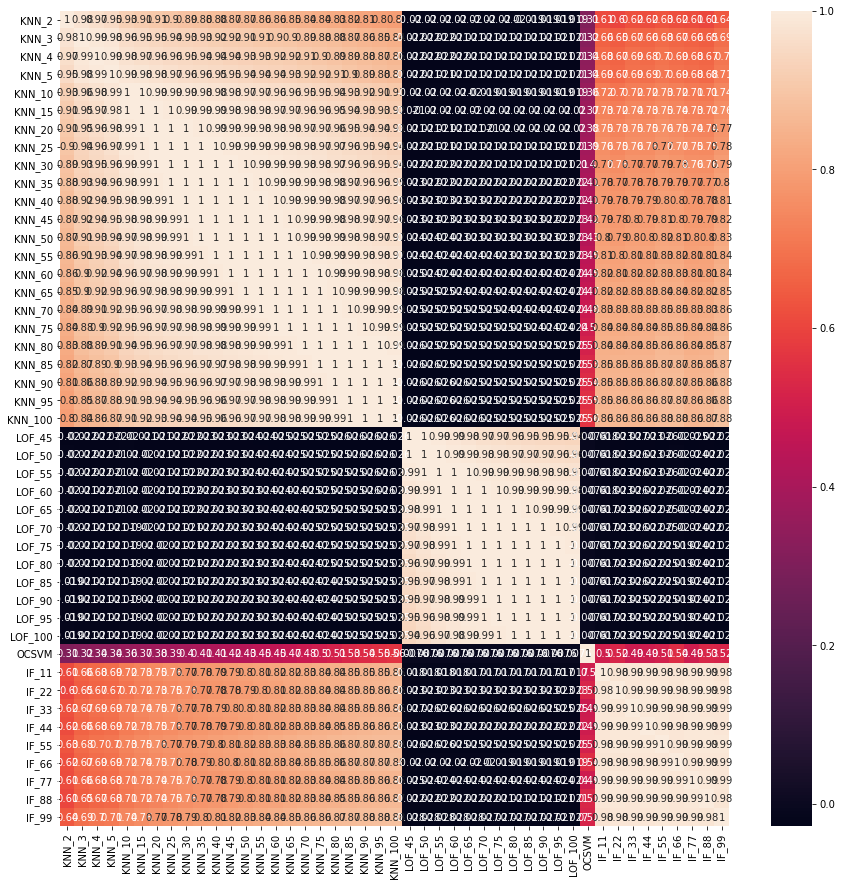

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [38]:
distance_matrix = 1-corr

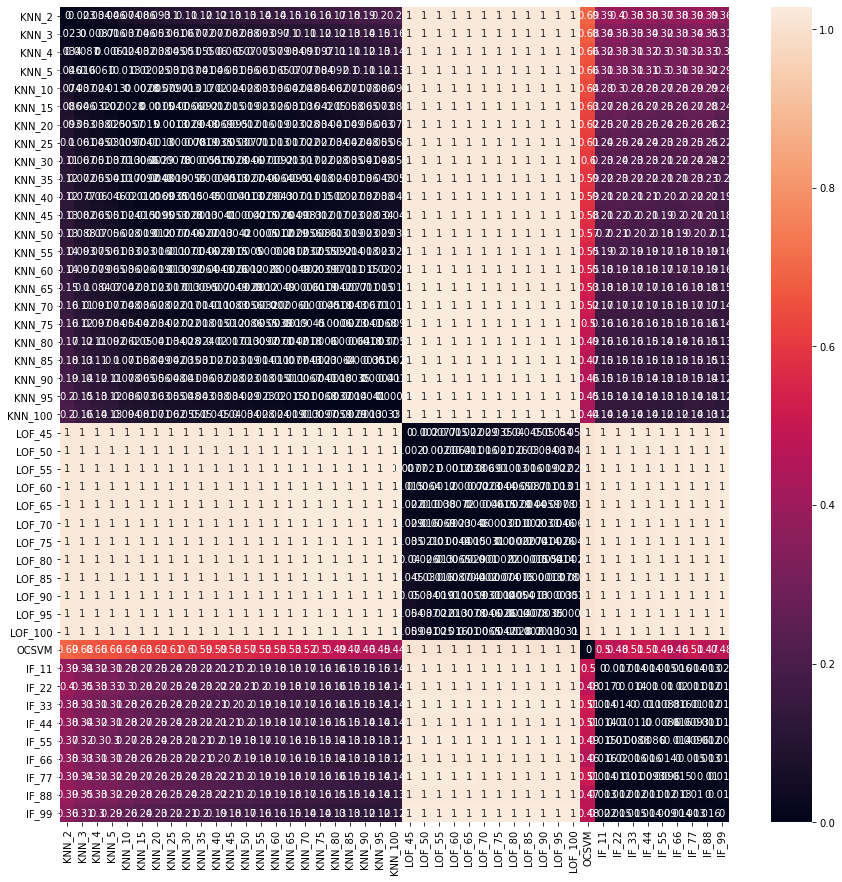

In [41]:
from medoid_radius import MedoidRadius

mr=MedoidRadius()

mr.fit(distance_matrix.values, 0.15)

In [42]:
mr.labels_

array([ 0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 35, 42, 42, 42, 42, 17, 17, 42, 42, 17])

In [43]:
np.unique(mr.labels_)

array([ 0, 17, 27, 35, 42])

In [58]:
df_new = pd.DataFrame()
for c in np.unique(mr.labels_):
    count=0
    x=np.zeros((n_samples, ))
    for index, l in enumerate(mr.labels_):
        if l==c:
            #print(index)
            x+=df_prediction.values[:, index]
            count+=1
    df_new[f'c_{c}']=x/count
    

In [59]:
df_new

,c_0,c_17,c_27,c_35,c_42
0,0.035469,0.141034,2.204501e-10,0.421748,0.512170
1,0.002815,0.032994,1.827094e-09,0.070474,0.199882
2,0.007106,0.152355,2.063101e-08,0.095633,0.574137
3,0.005432,0.035114,8.472280e-10,0.068444,0.183956
4,0.011710,0.034201,3.890454e-10,0.065109,0.094260
...,...,...,...,...,...
11178,0.036481,0.101483,3.191110e-09,0.089876,0.390845
11179,0.021554,0.087257,2.415819e-09,0.118008,0.324402
11180,0.170295,0.282926,1.691143e-08,0.142156,0.706563
11181,0.027953,0.073441,1.761889e-09,0.110364,0.245083


In [60]:
from xgboost import XGBClassifier

In [66]:
clf = XGBClassifier()
clf.fit(df_new.values, y)
y_proba = clf.predict_proba(df_new.values)
roc_auc_score(y, y_proba[:,1])

0.9904154254607427

In [68]:
clf = XGBClassifier()
clf.fit(df_prediction.values, y)
y_proba = clf.predict_proba(df_prediction.values)
roc_auc_score(y, y_proba[:,1])

0.9928175550532047

In [67]:
clf = XGBClassifier()
clf.fit(X, y)
y_proba = clf.predict_proba(X)
roc_auc_score(y, y_proba[:,1])

0.9930812893048543

In [72]:
X1=np.concatenate([X, df_prediction.values], axis=1)

In [73]:
X1.shape

(11183, 51)

In [74]:
clf = XGBClassifier()
clf.fit(X1, y)
y_proba = clf.predict_proba(X1)
roc_auc_score(y, y_proba[:,1])

0.9944714399397179

In [75]:
X2=np.concatenate([X, df_new.values], axis=1)
clf = XGBClassifier()
clf.fit(X2, y)
y_proba = clf.predict_proba(X2)
roc_auc_score(y, y_proba[:,1])

0.9941411559236333